# Ülkelerin yaşam kalitesi ve bunu etkileyen durumları inceleme.

- Veriye ilk bakış;

- Veri görselleştirme;
   1. Yaşam Maliyeti Endeksi ve Ülkeler açısından grafik incelemesi.
   2. Yaşam maliyeti, Ülkeler açısından ve kira endeksi açısından inceleme.
   3. Yaşam maliyeti, Ülkeler açısından ve Yaşam Maliyeti Artı Kira Endeksi açısından inceleme.
   4. Yaşam maliyeti, Ülkeler açısından ve Bakkaliye Endeksi Endeksi açısından inceleme.
   5. Yaşam maliyeti, Ülkeler açısından ve Restoran Fiyat Endeksi açısından inceleme.
   6. Yaşam maliyeti, Ülkeler açısından ve Yerel Satın Alma Gücü Endeksi açısından inceleme.

- Model kurma;
   1. Veriyi Yükleme ve Hazırlama
   2. Yapay Sinir Ağı Modelini Oluşturma
   3. Modelin Test Edilmesi
   4. Modelin Kaydedilmesi
   5. Modelin Yüklenmesi ve Tahmin yaptırma.

- Kulanıcı etkileşimle tahmin yaptırma;

- Sonuç;

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\realb\Desktop\yaşam maliyeti sırlama\data\wikipedia_cost_of_living_indices3.csv")

### Veriye ilk bakış

In [3]:
df.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [4]:
df.tail()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
116,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,India,21.2,5.6,13.7,23.8,15.1,82.6
118,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,Libya,20.4,4.3,12.7,22.2,15.2,42.0
120,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost of Living Index,121.0,43.555372,16.147574,18.8,30.2,39.5,52.8,101.1
Rent Index,121.0,16.052893,11.412267,2.4,8.5,12.4,20.1,67.2
Cost of Living Plus Rent Index,121.0,30.357851,13.263721,11.1,19.8,27.0,37.0,74.9
Groceries Index,121.0,44.228926,17.055109,17.5,31.6,40.5,53.7,109.1
Restaurant Price Index,121.0,36.471074,18.258110,12.8,21.6,33.1,47.2,97.0
Local Purchasing Power Index,121.0,65.094215,39.569094,2.3,34.8,50.6,99.4,182.5


In [6]:
df.shape

(121, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         121 non-null    object 
 1   Cost of Living Index            121 non-null    float64
 2   Rent Index                      121 non-null    float64
 3   Cost of Living Plus Rent Index  121 non-null    float64
 4   Groceries Index                 121 non-null    float64
 5   Restaurant Price Index          121 non-null    float64
 6   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.7+ KB


In [11]:
df.isnull().sum()

Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

### Veri görselleştirme

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [13]:
warnings.filterwarnings("ignore")

##### 1. Yaşam Maliyeti Endeksi ve Ülkeler açısından grafik incelemesi.

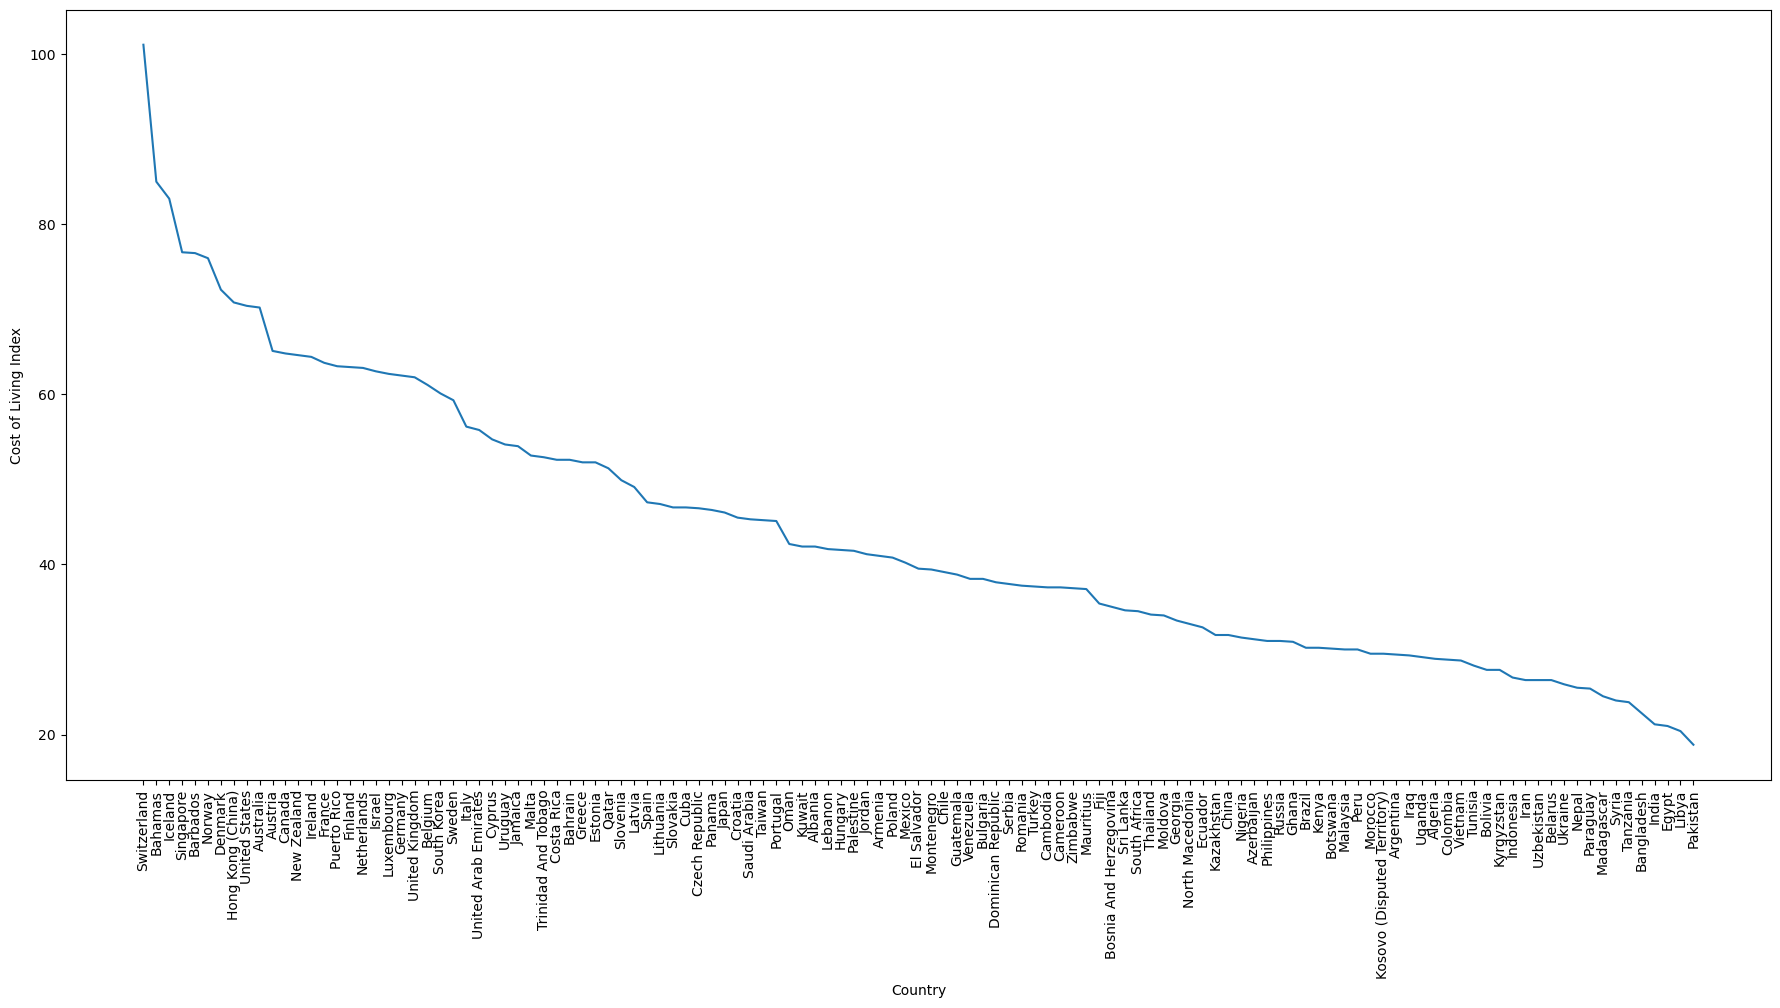

In [21]:
plt.figure(figsize=(22,10));
sns.lineplot(x = "Country", y = "Cost of Living Index", data = df);
plt.xticks(rotation=90);

#### 2. Yaşam maliyeti, Ülkeler açısından ve kira endeksi açısından inceleme.

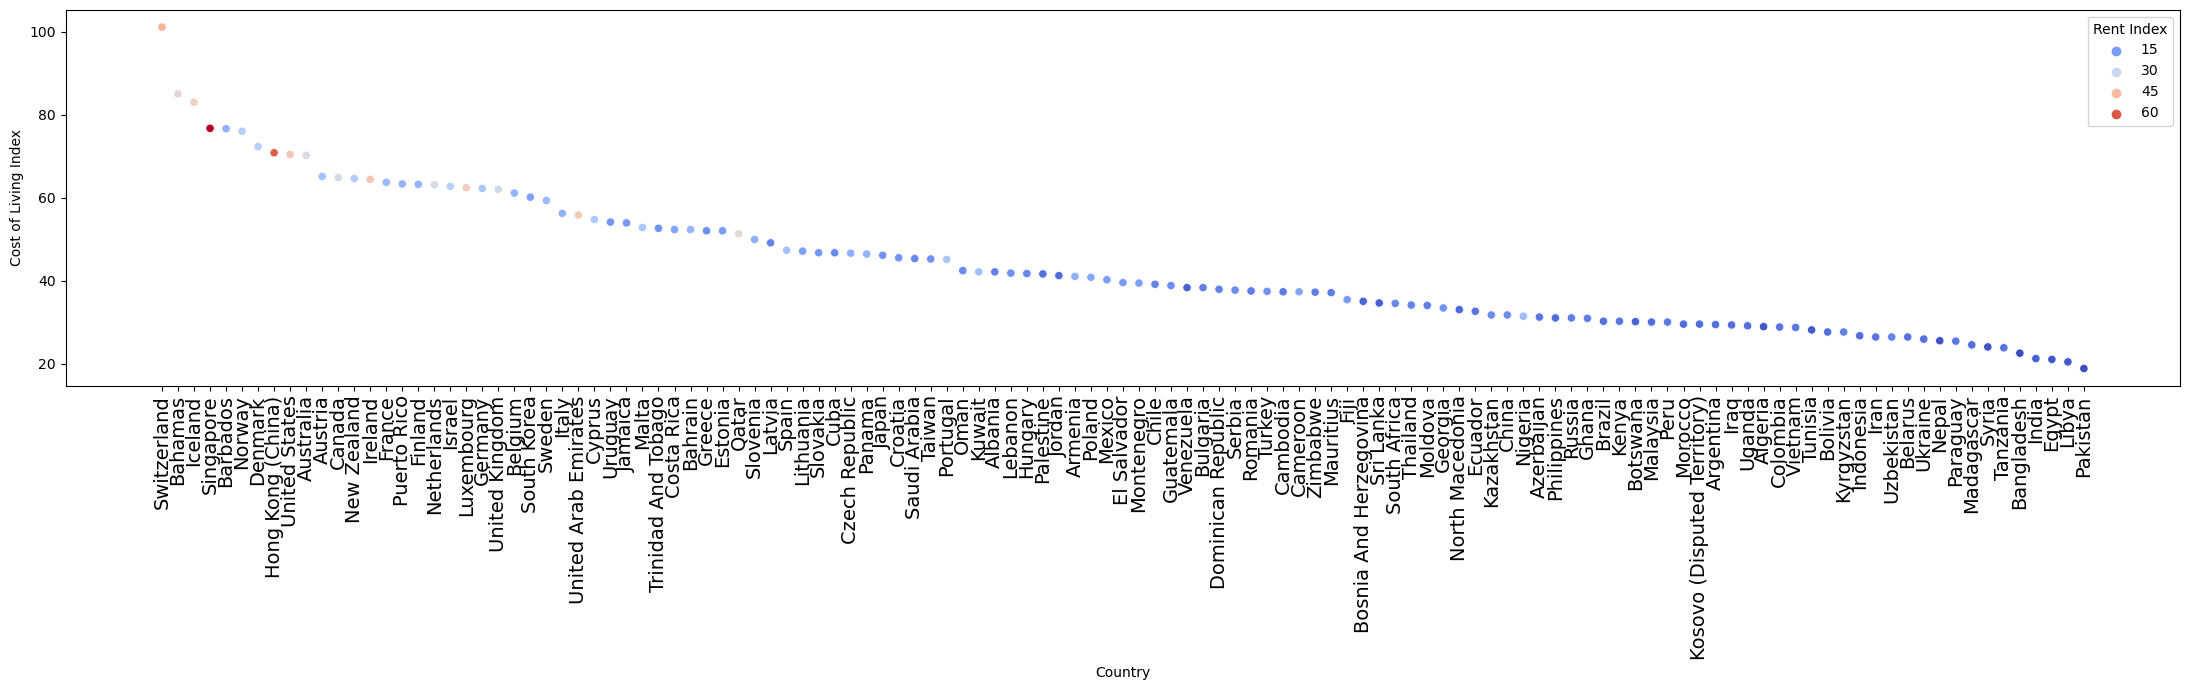

In [45]:
plt.figure(figsize=(22,7))

sns.scatterplot(x="Country", y="Cost of Living Index", hue="Rent Index", data=df, palette="coolwarm")
plt.xticks(rotation=90, fontsize=14)
plt.tight_layout()
plt.show()

##### 3. Yaşam maliyeti, Ülkeler açısından ve Yaşam Maliyeti Artı Kira Endeksi açısından inceleme.

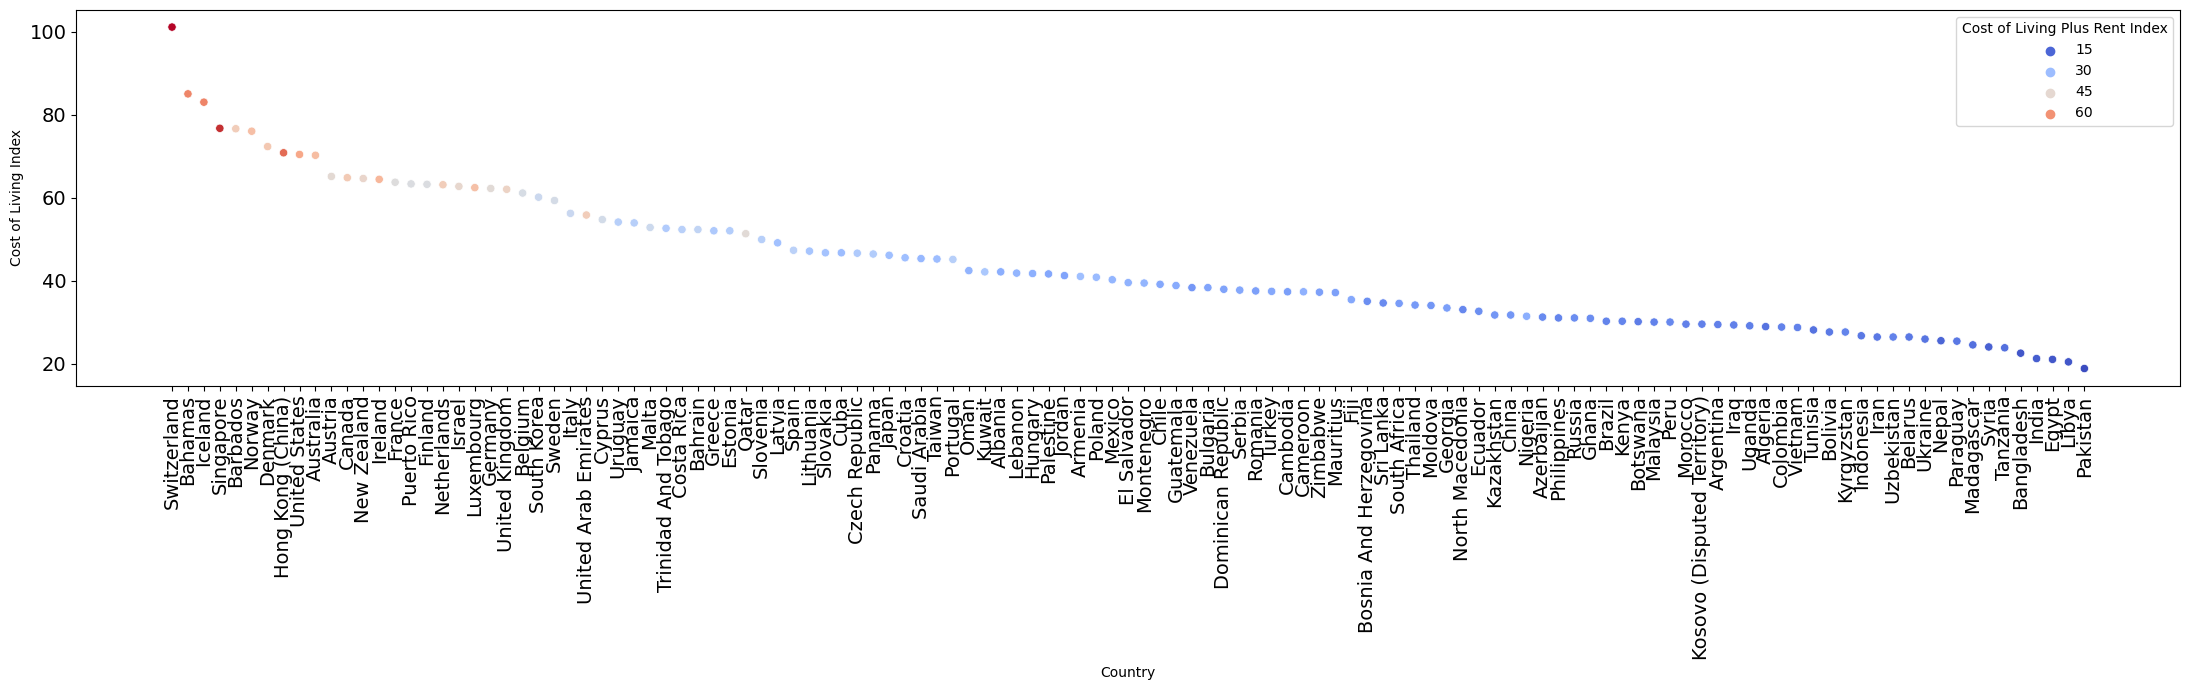

In [43]:
plt.figure(figsize=(22,7))

sns.scatterplot(x="Country", y="Cost of Living Index", hue="Cost of Living Plus Rent Index", data=df, palette="coolwarm")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

##### 4. Yaşam maliyeti, Ülkeler açısından ve Bakkaliye Endeksi Endeksi açısından inceleme.

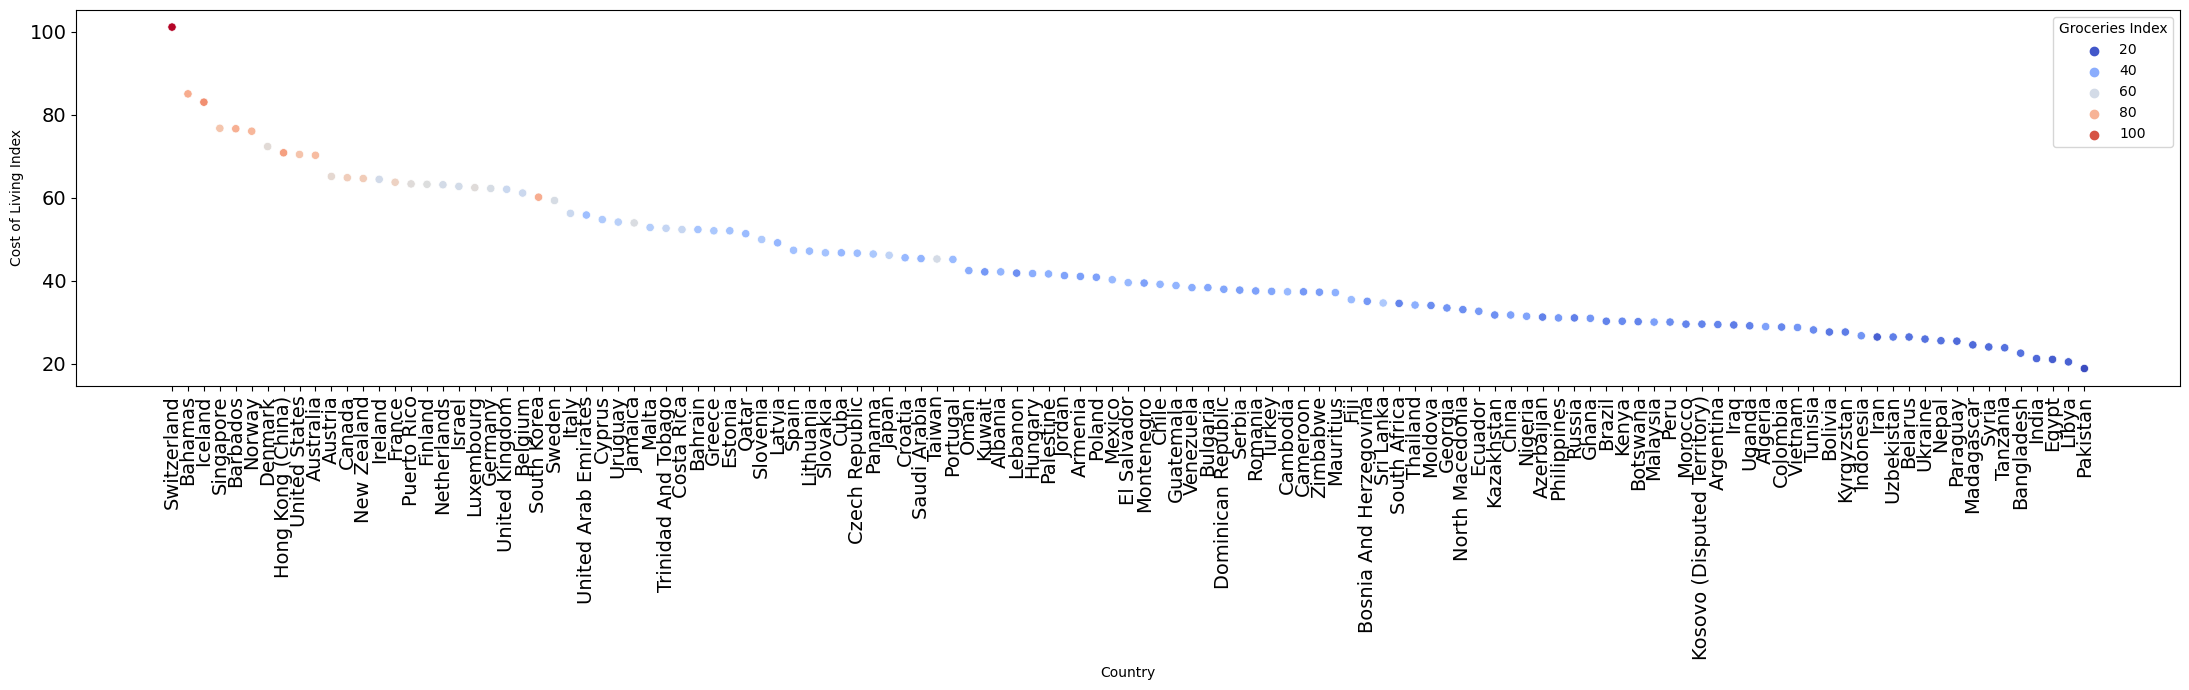

In [46]:
plt.figure(figsize=(22,7))

sns.scatterplot(x="Country", y="Cost of Living Index", hue="Groceries Index", data=df, palette="coolwarm")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

##### 5. Yaşam maliyeti, Ülkeler açısından ve Restoran Fiyat Endeksi açısından inceleme.

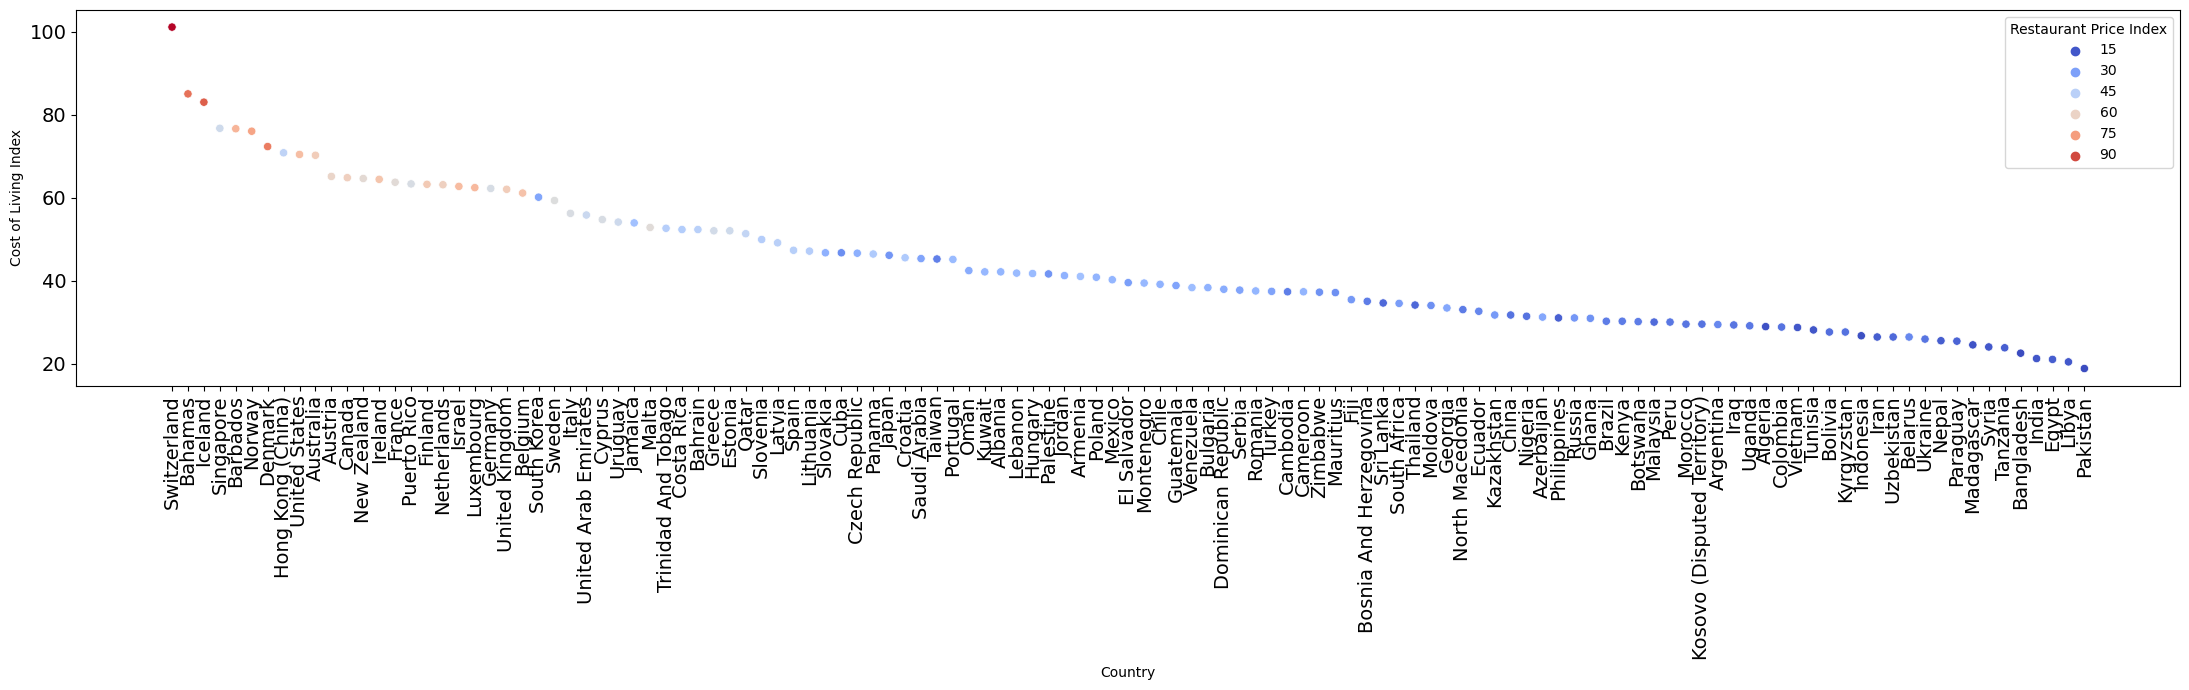

In [47]:
plt.figure(figsize=(22,7))

sns.scatterplot(x="Country", y="Cost of Living Index", hue="Restaurant Price Index", data=df, palette="coolwarm")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

##### 6. Yaşam maliyeti, Ülkeler açısından ve Yerel Satın Alma Gücü Endeksi açısından inceleme.

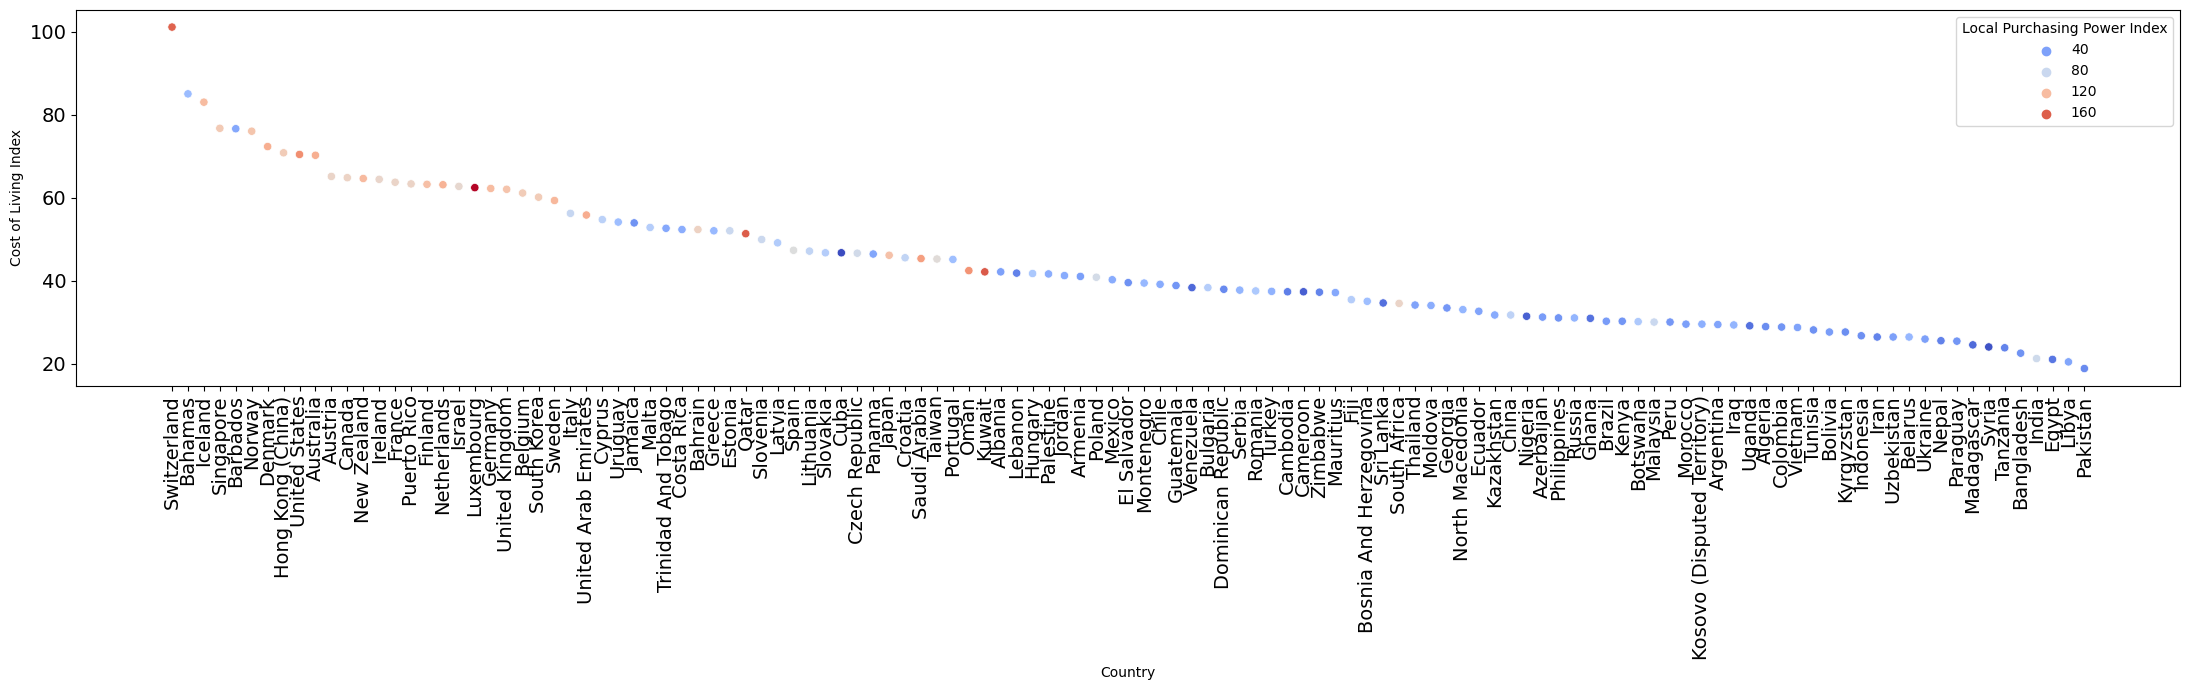

In [48]:
plt.figure(figsize=(22,7))

sns.scatterplot(x="Country", y="Cost of Living Index", hue="Local Purchasing Power Index", data=df, palette="coolwarm")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

### Model kurma

##### 1. Veriyi Yükleme ve Hazırlama

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Giriş (bağımsız) ve çıkış (bağımlı) değişkenlerini ayır
X = df.drop(columns=['Cost of Living Index', 'Country'])
y = df['Cost of Living Index']

# Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### 2. Yapay Sinir Ağı Modelini Oluşturma

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Yapay sinir ağı modelini oluştur
model = Sequential()

# Giriş katmanı ve ilk gizli katman
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# İkinci gizli katman
model.add(Dense(32, activation='relu'))

# Üçüncü gizli katman
model.add(Dense(16, activation='relu'))

# Çıkış katmanı
model.add(Dense(1, activation='linear'))

# Modeli derle
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğit
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)


Epoch 1/100
8/8 [==============================] - 1s 14ms/step - loss: 2133.9822 - val_loss: 1897.5437
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 2104.8867 - val_loss: 1871.4457
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 2081.1821 - val_loss: 1848.0300
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2056.9810 - val_loss: 1818.2224
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2022.7944 - val_loss: 1775.7731
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1975.4363 - val_loss: 1716.7887
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1910.8176 - val_loss: 1639.6230
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 1826.4807 - val_loss: 1538.3812
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 1711.4603 - val_loss: 1404.3148
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 

8/8 [==============================] - 0s 3ms/step - loss: 3.6064 - val_loss: 5.8983
Epoch 83/100
8/8 [==============================] - 0s 3ms/step - loss: 3.4151 - val_loss: 5.7655
Epoch 84/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2977 - val_loss: 5.6821
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 3.1814 - val_loss: 5.7189
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 3.0535 - val_loss: 5.4431
Epoch 87/100
8/8 [==============================] - 0s 3ms/step - loss: 2.9328 - val_loss: 5.3532
Epoch 88/100
8/8 [==============================] - 0s 3ms/step - loss: 2.8352 - val_loss: 5.3002
Epoch 89/100
8/8 [==============================] - 0s 3ms/step - loss: 2.7788 - val_loss: 5.3774
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 2.7090 - val_loss: 5.2276
Epoch 91/100
8/8 [==============================] - 0s 3ms/step - loss: 2.6360 - val_loss: 4.9579
Epoch 92/100
8/8 [===============

##### 3. Modelin Test Edilmesi

In [53]:
# Modelin test seti üzerindeki performansı
y_pred = model.predict(X_test)

# Performans ölçümleri
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

1/1 [==============================] - 0s 68ms/step
Mean Squared Error: 1.6842724262016382
R^2 Score: 0.9945374474012677


##### 4. Modelin Kaydedilmesi

In [54]:
# Modeli kaydet
model.save('cost_of_living_model.h5')

##### 5. Modelin Yüklenmesi ve Tahmin yaptırma.

In [56]:
from tensorflow.keras.models import load_model

from tensorflow.keras.models import load_model
import numpy as np

# Modeli yükle
model = load_model('cost_of_living_model.h5')

In [57]:
# Rastgele bir örnek seç
random_index = np.random.randint(0, len(X_test))
random_sample = X_test[random_index].reshape(1, -1)

# Modelin tahmini
predicted_value = model.predict(random_sample)[0][0]

# Gerçek değer
true_value = y_test.iloc[random_index]

# Sonuçları yazdırma
print(f"Gerçek Değer: {true_value}")
print(f"Tahmin Edilen Değer: {predicted_value}")

1/1 [==============================] - 0s 42ms/step
Gerçek Değer: 37.1
Tahmin Edilen Değer: 36.61187744140625


### Kulanıcı etkileşimle tahmin yaptırma.

In [66]:
import tkinter as tk
from tkinter import messagebox

In [68]:
# Tkinter arayüzü
def predict_cost_of_living():
    try:
        # Kullanıcı girişlerini al
        rent_index = float(entry_rent_index.get())
        cost_of_living_plus_rent = float(entry_cost_of_living_plus_rent.get())
        groceries_index = float(entry_groceries_index.get())
        restaurant_price_index = float(entry_restaurant_price_index.get())
        local_purchasing_power = float(entry_local_purchasing_power.get())

        # Girdi verilerini ölçeklendir
        user_input = np.array([[rent_index, cost_of_living_plus_rent, groceries_index, 
                                restaurant_price_index, local_purchasing_power]])
        user_input_scaled = scaler.transform(user_input)

        # Tahmin yap
        predicted_value = model.predict(user_input_scaled)[0][0]

        # Tahmin edilen değere en yakın ülkeyi bul
        df['Difference'] = abs(df['Cost of Living Index'] - predicted_value)
        closest_country = df.loc[df['Difference'].idxmin()]['Country']

        # Sonucu göster
        messagebox.showinfo("Tahmin",
                            f"Tahmin Edilen Cost of Living Index: {predicted_value:.2f}\n"
                            f"En Yakın Ülke: {closest_country}")

    except ValueError:
        messagebox.showerror("Hata", "Lütfen tüm alanlara geçerli sayısal değerler girin.")

# Tkinter ana pencere
root = tk.Tk()
root.title("Cost of Living Index Tahmin Aracı")

# Girdi alanları
tk.Label(root, text="Rent Index").grid(row=0, column=0)
entry_rent_index = tk.Entry(root)
entry_rent_index.grid(row=0, column=1)

tk.Label(root, text="Cost of Living Plus Rent Index").grid(row=1, column=0)
entry_cost_of_living_plus_rent = tk.Entry(root)
entry_cost_of_living_plus_rent.grid(row=1, column=1)

tk.Label(root, text="Groceries Index").grid(row=2, column=0)
entry_groceries_index = tk.Entry(root)
entry_groceries_index.grid(row=2, column=1)

tk.Label(root, text="Restaurant Price Index").grid(row=3, column=0)
entry_restaurant_price_index = tk.Entry(root)
entry_restaurant_price_index.grid(row=3, column=1)

tk.Label(root, text="Local Purchasing Power Index").grid(row=4, column=0)
entry_local_purchasing_power = tk.Entry(root)
entry_local_purchasing_power.grid(row=4, column=1)

# Tahmin butonu
predict_button = tk.Button(root, text="Tahmin Yap", command=predict_cost_of_living)
predict_button.grid(row=5, columnspan=2)

# Tkinter döngüsü
root.mainloop()

1/1 [==============================] - 0s 14ms/step


### Sonuç


Bu proje, ülkelerin yaşam kalitesini etkileyen çeşitli faktörleri inceleyerek, yapay sinir ağı (ANN) modelini kullanarak yaşam maliyeti tahminleri yapmayı hedeflemiştir. Proje adımları, verinin yüklenmesinden modelin test edilmesine kadar geniş bir süreci kapsamaktadır.

- Veri İncelemesi ve Görselleştirme:

İlk olarak, yaşam maliyeti endeksi ve bu endeksi etkileyen faktörlerin detaylı bir şekilde incelenmesi yapılmıştır. Çeşitli grafikler ve görselleştirmeler ile yaşam maliyeti, kira endeksi, yaşam maliyeti artı kira endeksi, bakkaliye endeksi, restoran fiyat endeksi ve yerel satın alma gücü endeksi gibi metrikler analiz edilmiştir. Ülkeler bazında yapılan bu incelemeler, yaşam kalitesinin çeşitli yönlerini daha iyi anlamamıza olanak sağlamıştır.

- Model Kurma ve Test Etme:

Modelin kurulumu ve test aşamasında, yapay sinir ağı (ANN) kullanılmıştır. Verinin yüklenmesi ve hazırlanmasının ardından model başarılı bir şekilde oluşturulmuş ve test edilmiştir. Modelin performansı değerlendirildiğinde, tahmin sonuçları ile gerçek değerler arasındaki uyum oldukça tatmin edicidir.

- Model Performansı:

- Modelin tahmin başarımı şu şekilde olmuştur:

Gerçek Değer: 37.1
Tahmin Edilen Değer: 36.61
- Modelin genel başarım ölçütleri ise aşağıdaki gibidir:

Mean Squared Error (MSE): 1.684
R^2 Score: 0.995
Bu sonuçlar, modelimizin yüksek doğruluk oranına sahip olduğunu ve yaşam maliyeti tahminlerinde oldukça başarılı bir performans sergilediğini göstermektedir. R^2 skoru 1'e yakın bir değerle, modelin gerçek verilere olan uyumunun mükemmel olduğunu ifade ederken, MSE değeri ise modelin tahmin hatalarının düşük olduğunu göstermektedir.

- Sonuç:

Proje sonucunda, yapay sinir ağı modelinin ülkelerin yaşam maliyeti tahminlerinde yüksek doğruluk oranı sağladığı ve modelin genel performansının oldukça tatmin edici olduğu ortaya çıkmıştır. Elde edilen sonuçlar, yaşam kalitesinin çeşitli faktörler ışığında detaylı bir şekilde analiz edilmesi ve bu verilerin güçlü bir tahmin modeli ile işlenmesinin önemini vurgulamaktadır.

Bu çalışma, gelecekte yaşam kalitesi ile ilgili daha kapsamlı araştırmalar ve model iyileştirmeleri için sağlam bir temel oluşturmuştur.